In [ ]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.iloc[:, ::-1]
df['target'] = data.target


# x, y = data.data, data.target
train_split = int(0.8 * len(data.data)) # 80% training, 20% for testing
# x_train,y_train = x[:train_split],y[:train_split]
# x_test, y_test = x[train_split:], y[train_split:]

train_data = df[:train_split]
test_data = df[train_split:]
# train_data = train_data.iloc[:, ::-1]
display(train_data)
display(test_data)

,Longitude,Latitude,AveOccup,Population,AveBedrms,AveRooms,HouseAge,MedInc,target
0,-122.23,37.88,2.555556,322.0,1.023810,6.984127,41.0,8.3252,4.526
1,-122.22,37.86,2.109842,2401.0,0.971880,6.238137,21.0,8.3014,3.585
2,-122.24,37.85,2.802260,496.0,1.073446,8.288136,52.0,7.2574,3.521
3,-122.25,37.85,2.547945,558.0,1.073059,5.817352,52.0,5.6431,3.413
4,-122.25,37.85,2.181467,565.0,1.081081,6.281853,52.0,3.8462,3.422
...,...,...,...,...,...,...,...,...,...
16507,-121.11,37.74,3.034026,1605.0,1.132325,7.345936,11.0,4.4213,1.827
16508,-121.10,37.80,2.817647,958.0,0.973529,5.450000,35.0,3.3578,1.490
16509,-121.11,37.76,3.153652,1252.0,1.035264,6.564232,22.0,4.1833,1.921
16510,-121.16,37.73,3.285246,3006.0,1.028415,5.416393,7.0,3.4426,1.390


,Longitude,Latitude,AveOccup,Population,AveBedrms,AveRooms,HouseAge,MedInc,target
16512,-121.22,37.72,3.559783,1310.0,1.051630,5.769022,34.0,2.6368,1.656
16513,-121.22,37.81,3.400000,1802.0,1.022642,5.432075,17.0,3.6378,1.261
16514,-121.22,37.80,3.102888,1719.0,1.039711,4.707581,28.0,2.1186,0.944
16515,-121.22,37.80,2.469194,521.0,1.052133,4.919431,37.0,2.1250,0.919
16516,-121.21,37.81,3.025692,1531.0,0.984190,4.750988,18.0,2.9950,1.243
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,2.560606,845.0,1.133333,5.045455,25.0,1.5603,0.781
20636,-121.21,39.49,3.122807,356.0,1.315789,6.114035,18.0,2.5568,0.771
20637,-121.22,39.43,2.325635,1007.0,1.120092,5.205543,17.0,1.7000,0.923
20638,-121.32,39.43,2.123209,741.0,1.171920,5.329513,18.0,1.8672,0.847


array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

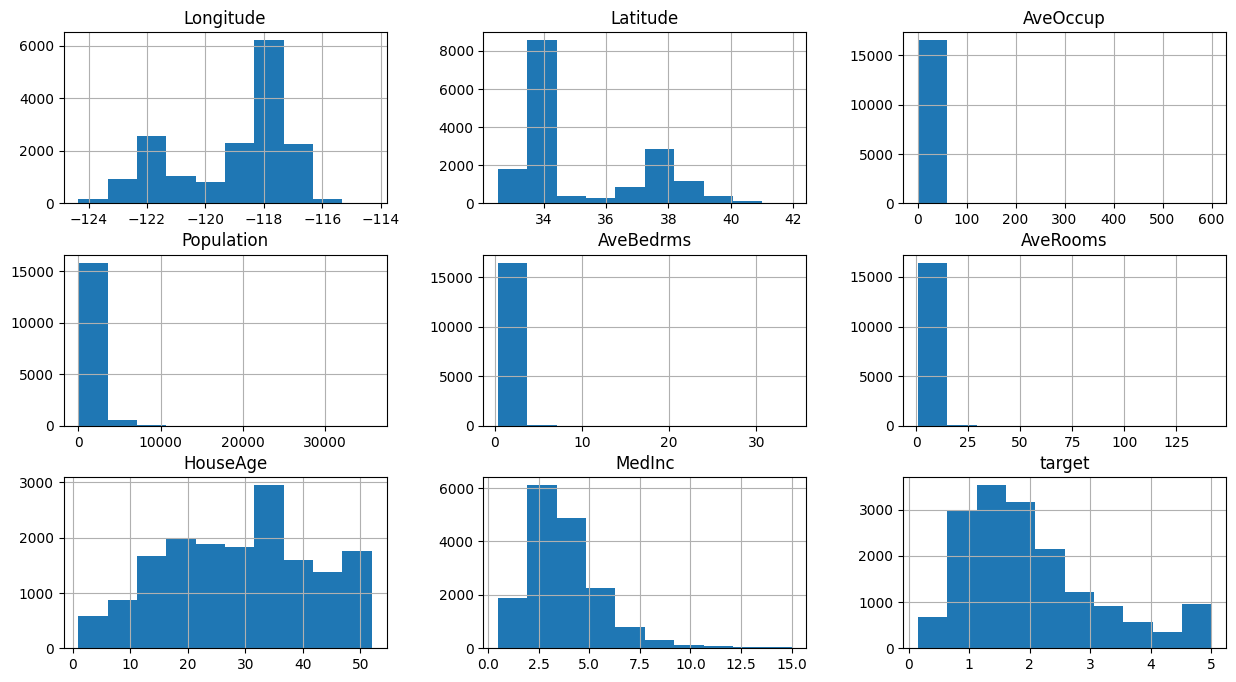

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.corr()

,Longitude,Latitude,AveOccup,Population,AveBedrms,AveRooms,HouseAge,MedInc,target
Longitude,1.000000,-0.934175,0.019222,0.111010,0.003269,-0.020427,-0.177149,0.042447,0.014657
Latitude,-0.934175,1.000000,-0.004022,-0.113222,0.082772,0.112462,0.054329,-0.108057,-0.174082
AveOccup,0.019222,-0.004022,1.000000,0.062689,-0.008742,-0.007086,0.008232,-0.002136,-0.052333
Population,0.111010,-0.113222,0.062689,1.000000,-0.065003,-0.072038,-0.302579,0.003572,-0.026961
AveBedrms,0.003269,0.082772,-0.008742,-0.065003,1.000000,0.865492,-0.084193,-0.053400,-0.038306
AveRooms,-0.020427,0.112462,-0.007086,-0.072038,0.865492,1.000000,-0.155581,0.312501,0.137197
HouseAge,-0.177149,0.054329,0.008232,-0.302579,-0.084193,-0.155581,1.000000,-0.123636,0.118674
MedInc,0.042447,-0.108057,-0.002136,0.003572,-0.053400,0.312501,-0.123636,1.000000,0.672577
target,0.014657,-0.174082,-0.052333,-0.026961,-0.038306,0.137197,0.118674,0.672577,1.000000


<Axes: >

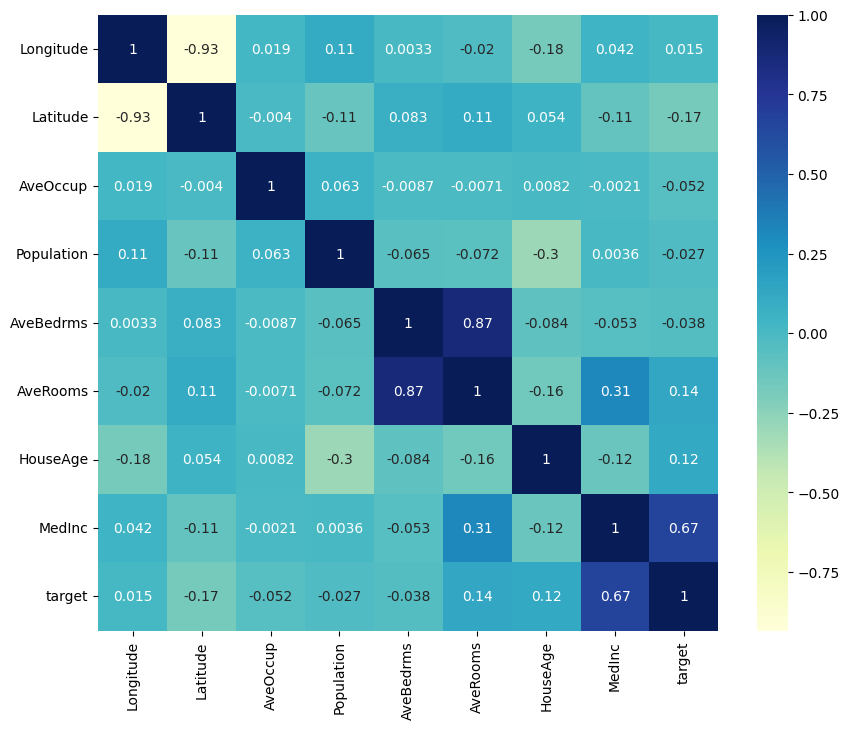

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")